<a href="https://colab.research.google.com/github/kumarlova/Airbnb/blob/main/Copy_of_Copy_of_Copy_of_Airbnv_ipynb_finel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://shorttermrentalz.com/wp-content/uploads/2021/02/airbnb_guide.jpg)

#**What does Airbnb stand for?**
Airbnb is an abbreviation for **A**ir mattress **B**ed and **B**reakfast.


#**What is Airbnb?**
An online marketplace that involves the renting of property to travellers. 

Airbnb does not own any of the properties. It provides a platform on which people can rent out their properties or spare rooms to guests. Prices are set by the property owners and monies are collected via the Airbnb app.

There are many different types of Airbnbs. You can rent a room in someone’s house or a whole island and everything in between!



#**The History of Airbnb**
Airbnb was founded in August 2008 by Joe Gebbia, Brian Chesky, and Nathan Blecharczyk, with its headquarters in San Francisco, USA.

The idea came to Brian Chesky and Joe Gebbia in 2007 when they could not afford to pay the rent for their apartment. They transformed their living room into a bedroom in order to ‘share’ their home with three guests and provided them with homemade breakfast. This was the beginning of the Airbnb concept.

![alt text](https://i2.wp.com/www.lifeasabutterfly.com/wp-content/uploads/how-airbnb-started-infographic.png?fit=1024%2C798&ssl=1)

#**Lets Being our Stay**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Airbnb data/Copy of Airbnb NYC 2019.csv")

In [ ]:
# checking first five rows of Data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.index

RangeIndex(start=0, stop=48895, step=1)

In [ ]:
df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Checking the Data types shape of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# checking different type of columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Chekcking the number of unique values in each column
_dict_ = {}
for i in list(df.columns):
  _dict_.update({i:df[i].nunique()})
_dict_

{'availability_365': 366,
 'calculated_host_listings_count': 47,
 'host_id': 37457,
 'host_name': 11452,
 'id': 48895,
 'last_review': 1764,
 'latitude': 19048,
 'longitude': 14718,
 'minimum_nights': 109,
 'name': 47905,
 'neighbourhood': 221,
 'neighbourhood_group': 5,
 'number_of_reviews': 394,
 'price': 674,
 'reviews_per_month': 937,
 'room_type': 3}

#**Insights into the number of Unique values of each variable**


*   Some hosts_ids has more than 1 property available for listing
*   Since host_ids are the unique identification number either there are multiple host with same name orthey have multiple host_ids based on different location.



In [ ]:
#checking the number of listings by host_name
df.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

Michael has rented the most number of places lets check the the dataset with Michael as host

In [ ]:
#checkig the number of listing of Michael
df[df['host_name'] =='Michael']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
151,36121,Lg Rm in Historic Prospect Heights,62165,Michael,Brooklyn,Prospect Heights,40.67386,-73.96641,Private room,85,15,9,2013-05-10,0.09,1,339
412,138216,Sunny and Spacious Designer's Home,674970,Michael,Brooklyn,Greenpoint,40.72212,-73.94254,Entire home/apt,141,5,8,2018-07-08,0.21,1,9
519,189135,Hell's Kitchen Funky 80's Hideaway!,179020,Michael,Manhattan,Hell's Kitchen,40.76311,-73.99388,Private room,99,1,89,2019-07-01,1.00,1,353
616,233189,NYC Studio in Heart of Times Square,1220414,Michael,Manhattan,Hell's Kitchen,40.76166,-73.99675,Entire home/apt,179,30,83,2019-05-31,0.88,1,292
811,289037,"2BR in Cobble Hill, Brooklyn, NY",632334,Michael,Brooklyn,Carroll Gardens,40.68353,-73.99140,Entire home/apt,189,2,13,2016-09-05,0.18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48378,36228909,Sunny SoHo Penthouse w/ Pvt. Terrace!,272485928,Michael,Manhattan,SoHo,40.72336,-74.00465,Entire home/apt,600,3,0,NaN,NaN,1,179
48531,36310247,Spacious 1 Bedroom With Private Garden,25498509,Michael,Brooklyn,Clinton Hill,40.68183,-73.96464,Entire home/apt,100,1,0,NaN,NaN,1,6
48786,36426788,Serene Room 5 mins from JFK / 15 mins from LGA,266645207,Michael,Queens,Laurelton,40.67025,-73.74548,Private room,75,1,0,NaN,NaN,2,180
48830,36450318,"LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE",151831356,Michael,Manhattan,Midtown,40.74607,-73.98599,Entire home/apt,199,1,0,NaN,NaN,1,14


#**Insights on Variables**
Each property has particular Host_id, but particular host could have multiple properties available for listing

**Categorical Variables** : name,host_name ,neighbourhood_group,neighbourhood,room_type

**Numerical variables** :id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365.


#**Attributes of each variable:**

**id** : Unique for each Propety Listing.

**name** : Name of the each Propety Listing. 

**host_id** : Unique ID for host who have listed the property on Airbnb.

**host_name** : Name of host

**neighbourhood_group** : Name of Each boroughs of NYC, ***Manhattan, Brooklyn,Queens,Bronx, State Island.***

**neighbourhood** : Area in each borough of NYC

**latitude, longitude** : Co-ordinates of each listed property

**room_type** : Differnt types of room available for listing , ***Private room,Entire home/apt,Shared room.***

**price** : Price of listing.

**minimum_nigths**  : Mandatory number of nights to be booked for available foe each type of property.

**number_of_review** : Number of reviews for each Listed property 

**last_review** : Date on whcih last time the listing was reviewed

**review_per_month** : Number of reviews per month

**calculated_host_listings_count** : Number of listing each host owns

**availablity_365** : Number of days the given listing is available for booking








In [ ]:
#checking the aspects of numeric data in thes set
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


There are some listings available with 0 price! 

Neighbourhood, price,reviews are the primary attributes that will attract customers.

#**Minium pricing, good locale and positive review will be ideal location for stay.  minimal number_of_nights and availablity will be like cherry on cake!!**

In [ ]:
# lets check on the missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Missig Values:**
lets replace the Names and host_names with some strings as both are categorical variables

In [ ]:
df['name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

 **Removeing last_review'** last_review' has many null values, it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. lest drop this column


In [ ]:
# removeing the last_review column
df= df.drop(['last_review'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [ ]:
# reviews per month has lot of null values as well, let replace them with 0
df['reviews_per_month'].replace(np.nan,0,inplace =True)

Lets see if there are some Correlation withhin this variables

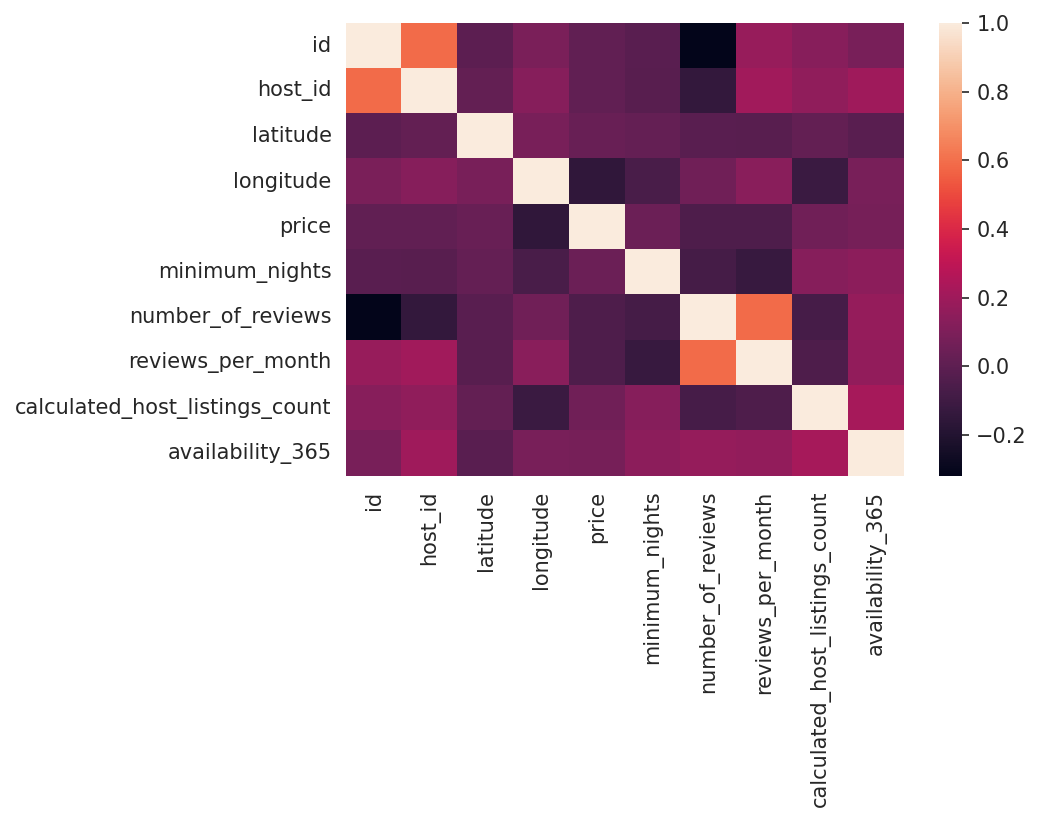

In [ ]:
plt.rcParams['figure.dpi'] = 150
sns.heatmap(df.corr())

#**Heatmaps conclusions**

Looks like  host_id and reviews_per_month are positively  co-related

id and reviews_per_month are also co-related positively

In [ ]:
#Creating data frame based on the number of stays in each boroughs
Count_grp_neighbourhood = df['neighbourhood_group'].value_counts().to_frame().reset_index()
Count_grp_neighbourhood.columns = ['neighbourhood_group','Count']

In [ ]:
Count_grp_neighbourhood  # lets see what we have got!

,neighbourhood_group,Count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


# **Visualizing the Boroughs**

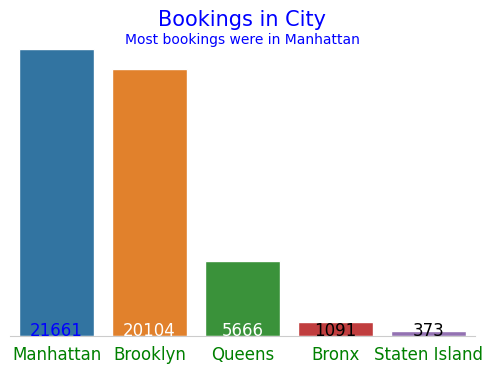

In [ ]:
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
sns.barplot(data=Count_grp_neighbourhood, x="neighbourhood_group", y="Count")
plt.xlabel('')
plt.ylabel('')
plt.title('Bookings in City', size=15, color='b')
plt.xticks(size=12, color='green')
plt.yticks([], [])
plt.text(x=2, y=22000, s='Most bookings were in Manhattan', color='blue', fontsize=10, horizontalalignment='center')
plt.text(x=0, y=2, s=Count_grp_neighbourhood.loc[0,'Count'], color='b', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=2, s=Count_grp_neighbourhood.loc[1,'Count'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=2, y=2, s=Count_grp_neighbourhood.loc[2,'Count'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=3, y=2, s=Count_grp_neighbourhood.loc[3,'Count'], color='black', fontsize=12, horizontalalignment='center')
plt.text(x=4, y=2, s=Count_grp_neighbourhood.loc[4,'Count'], color='black', fontsize=12, horizontalalignment='center')
sns.despine(left=True);

**Lets See how is the Distribution of the Hosts**(host_ids)

In [ ]:
# Creating dataFrame for the unique number of hosts in each borough
Number_host =df[['host_id','neighbourhood_group']].drop_duplicates().groupby(['neighbourhood_group']).count().sort_values('host_id',ascending = False).reset_index()

In [ ]:
Number_host

,neighbourhood_group,host_id
0,Manhattan,16578
1,Brooklyn,15966
2,Queens,3983
3,Bronx,789
4,Staten Island,256


**Visualizing the Host Distribution**

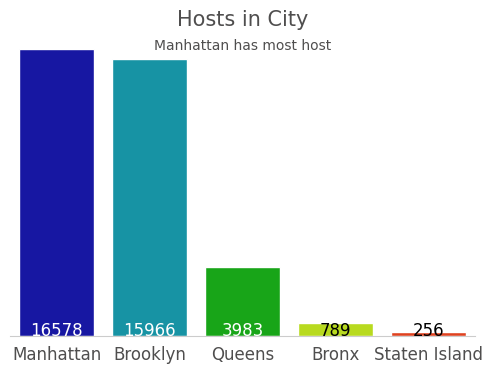

In [ ]:
plt.rcParams['figure.dpi'] = 100
sns.barplot(data=Number_host, x="neighbourhood_group", y="host_id", palette= "nipy_spectral")
plt.xlabel('')
plt.ylabel('')
plt.title('Hosts in City', size=15, color='#4f4e4e')
plt.xticks(size=12, color='#4f4e4e')
plt.yticks([], [])
plt.text(x=2, y=16500, s='Manhattan has most host', color='#4f4e4e', fontsize=10, horizontalalignment='center')
plt.text(x=0, y=2, s=Number_host.loc[0,'host_id'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=2, s=Number_host.loc[1,'host_id'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=2, y=2, s=Number_host.loc[2,'host_id'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=3, y=2, s=Number_host.loc[3,'host_id'], color='black', fontsize=12, horizontalalignment='center')
plt.text(x=4, y=2, s=Number_host.loc[4,'host_id'], color='black', fontsize=12, horizontalalignment='center')
sns.despine(left=True);


*   **Manhattan has the most number of customer stays followed by Brooklyn**


* **Most customer stays explains the high number of hosts Manhattan has.** 

*   **Most customer stays is direclty related to number of hosts each borough has.** 

#**Top Neighbourhoods with most Listing**

In [ ]:
df_neighbour = df.neighbourhood.value_counts().reset_index() # Creating Dataframe for the Top neighbourhoods

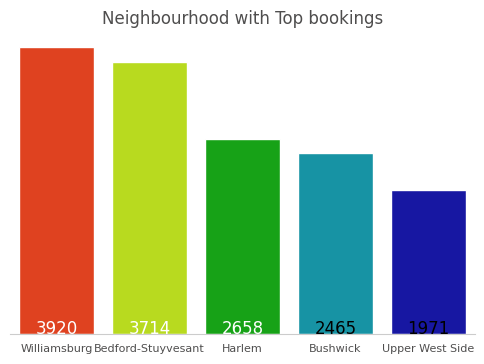

In [ ]:
#Visualizing the created dataframe
sns.barplot (data = df_neighbour.head(5),x = 'index',y = 'neighbourhood',palette = "nipy_spectral_r")
plt.title('Neighbourhood with Top bookings',size = 12,color = '#4f4e4e')
plt.xlabel('')
plt.ylabel('')
plt.yticks([],[])
plt.xticks(size=8, color='#4f4e4e')
plt.text(x=0, y=8, s=df_neighbour.loc[0,'neighbourhood'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=8, s=df_neighbour.loc[1,'neighbourhood'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=2, y=8, s=df_neighbour.loc[2,'neighbourhood'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=3, y=8, s=df_neighbour.loc[3,'neighbourhood'], color='black', fontsize=12, horizontalalignment='center')
plt.text(x=4, y=8, s=df_neighbour.loc[4,'neighbourhood'], color='black', fontsize=12, horizontalalignment='center')
sns.despine(left=True);

**Willamsburg** and **Bedfor-Stuyvesant** are the top neighbourhoods with most bookings

#**What kind of Room each boroughs has to offer**

In [ ]:
#creating Dataframe with by grouping the room_types, neighbourhood_group
Room_types = pd.DataFrame(df[['host_id','room_type','neighbourhood_group']].groupby(['neighbourhood_group','room_type']).host_id.count()).reset_index()

In [ ]:
Room_types.sort_values('host_id',ascending = False)

,neighbourhood_group,room_type,host_id
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


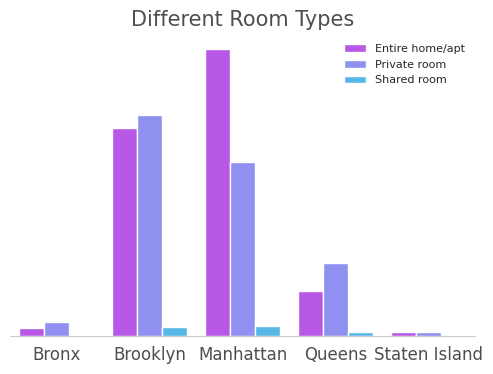

In [ ]:
# Visualizing the types of room each Boroughs has to offer.
# Manhattan has the most bookings of Entier Home, and brooklyn has most booking of Private room

sns.barplot(data=Room_types, x="neighbourhood_group", y="host_id", palette= "cool_r",hue ='room_type')
plt.xlabel('')
plt.ylabel('')
plt.yticks([],[])
plt.title('Different Room Types', size=15, color='#4f4e4e')
plt.legend(loc="upper right", frameon=False, fontsize= 8)
plt.xticks(size=12, color='#4f4e4e')
sns.despine(left = True);

**Manhattan** leads the group with the most rooms bookings, Cutomer prefer **Entire room** in Manhattan more than the **Private room**.

Customer in Brooklyn prefert **Private rooms** more than the **Entire rooms**

#**Top Hosts**

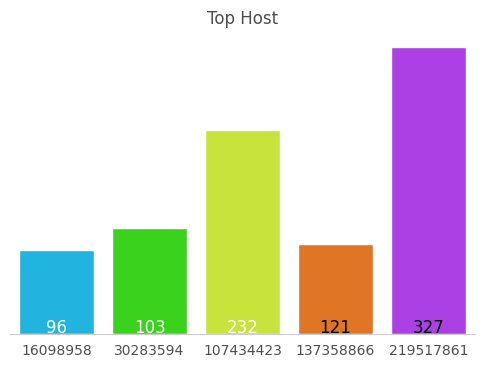

In [ ]:
Top_host = df.host_id.value_counts().to_frame().reset_index().head(5) # creating the dateframe for top host

#barplot Visualizing of host
sns.barplot(data= Top_host, x="index", y="host_id", palette= "gist_ncar")
plt.xlabel('')
plt.ylabel('')
plt.title('Top Host', size=12, color='#4f4e4e')
plt.xticks(size=10, color='#4f4e4e',rotation = 0)
plt.yticks([], [])
plt.text(x=0, y=2, s=Top_host.loc[4,'host_id'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=2, s=Top_host.loc[3,'host_id'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=2, y=2, s=Top_host.loc[1,'host_id'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=3, y=2, s=Top_host.loc[2,'host_id'], color='black', fontsize=12, horizontalalignment='center')
plt.text(x=4, y=2, s=Top_host.loc[0,'host_id'], color='black', fontsize=12, horizontalalignment='center')
sns.despine(left = True);

**Host,Sonder(NYC) with Host_id 219517861 has hosted most customers**
**Host, Blueground is the second with total 232 customers**

In [ ]:
df[df['host_id']== 219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,0.00,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,0.00,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,0.00,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,0.00,327,327


# **Lest Check the average Minimum number of Nights for each room type**

In [ ]:
# Creating data Frame for the Avg amount of minimum nights

f = {'host_id':['count'],'minimum_nights' :['mean']}  # variable to be used for Agg function 

DF3 = df[['host_id','room_type','minimum_nights']].groupby(['room_type']).agg(f).reset_index()   # creating the dataframe

DF3.columns = ['room_type','Count_booking','Minimum_nights']

DF3['Minimum_nights'] = DF3.Minimum_nights.round()
DF3.sort_values('Minimum_nights',ascending = False,inplace = True)

In [ ]:
DF3

,room_type,Count_booking,Minimum_nights
0,Entire home/apt,25409,9.0
2,Shared room,1160,6.0
1,Private room,22326,5.0


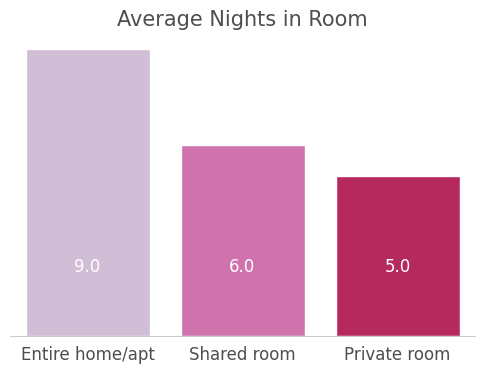

In [ ]:
sns.barplot(data= DF3,x = 'room_type',y = 'Minimum_nights',palette = 'PuRd')
plt.xlabel('')
plt.ylabel('')
plt.title('Average Nights in Room', size=15, color='#4f4e4e')
plt.xticks(size=12, color='#4f4e4e')
plt.yticks([], [])
plt.text(x=0, y=2, s=DF3.loc[0,'Minimum_nights'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=2, s=DF3.loc[2,'Minimum_nights'], color='white', fontsize=12, horizontalalignment='center')
plt.text(x=2, y=2, s=DF3.loc[1,'Minimum_nights'], color='white', fontsize=12, horizontalalignment='center')
sns.despine(left=True);



*   **Average 9 nights are mandatory for stay for booking of Entire home**


*   **shared room is second with average minimum  6 nights.**







# **Lets check on overall distribution of availability in each boroughs**

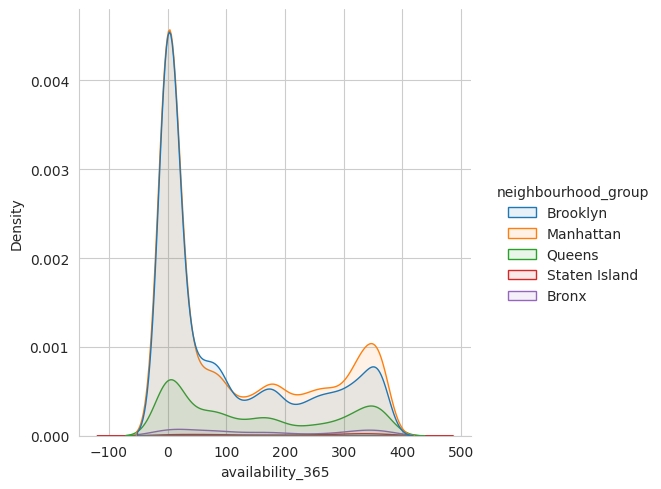

In [ ]:
sns.displot(data= df, x= "availability_365", kind="kde",hue = 'neighbourhood_group',fill = True,alpha = 0.1)

**Room availability pattern for Manhattan and Brooklyn is idnetical with  same peak close the zero, this shows most of the Listing are not available for booking in Manhattan and Brooklyn.**

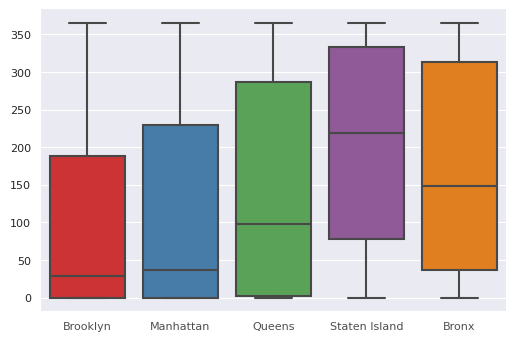

In [ ]:
# lets see the box plot of avaiablity to dive deeper
sns.set_style("darkgrid")
sns.boxplot(data =df,x ='neighbourhood_group',y ='availability_365',palette = 'Set1')
plt.xticks(size=8, color='#4f4e4e')
plt.xlabel('')
plt.ylabel('')
plt.yticks(size = 8)
sns.despine(left = True, bottom  = True)

**Brooklyn has the least availability followed by Manhattan**

#**lets see what we can do with the reviews_month**

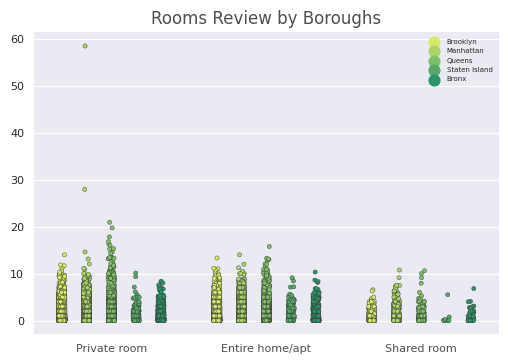

In [ ]:
# Plotting the reviews_per_month againt
sns.set_style("darkgrid")
sns.stripplot(x="room_type", y="reviews_per_month",hue = 'neighbourhood_group' ,data=df, dodge = True,edgecolor ='gray',linewidth = 0.3,palette = 'summer_r',size = 3)
plt.xlabel('')
plt.ylabel('')
plt.yticks(size = 8)
plt.title('Rooms Review by Boroughs', size=12, color='#4f4e4e')
plt.xticks(size=8, color='#4f4e4e')
plt.legend(loc="upper right", frameon=False, fontsize= 5)
sns.despine(left = True,bottom = True);

**Private Rooms** are the most reviewed amongs the types of rooms.
**Manhattan** is the most reviewed followed by **Queens**


#**REVIEWING PRICE FOR EACH BOROUGHS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


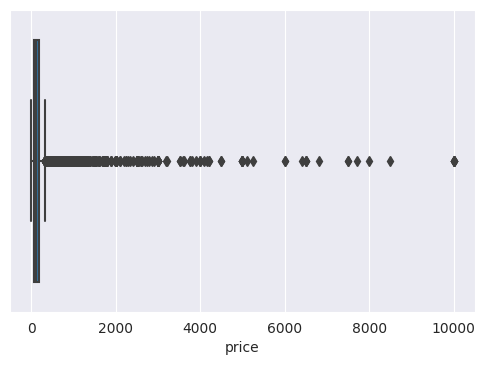

In [ ]:
sns.boxplot(df.price) # ther are many outliers

#**Removing outliers** using IQR

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.540000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [ ]:
# writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df['price'])

In [ ]:
df[(df.price < lower_bound) | (df.price > upper_bound)] #looking at the low and upper range outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0.00,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0.00,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0.00,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0.00,1,9


In [ ]:
# deriving the Data used only that is within the IQR
df_subset = df[(df.price>lower_bound) & (df.price<upper_bound)]

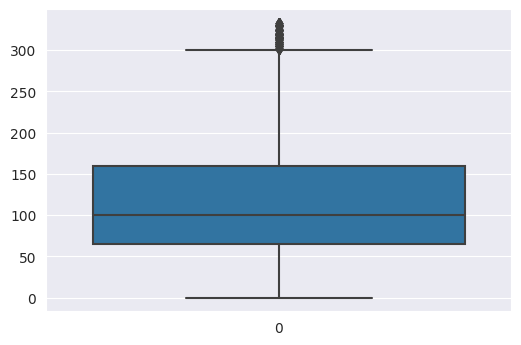

In [ ]:
# Plotting Box plot based on the IQR to check for outliers
sns.boxplot(data = df_subset['price']) # the

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

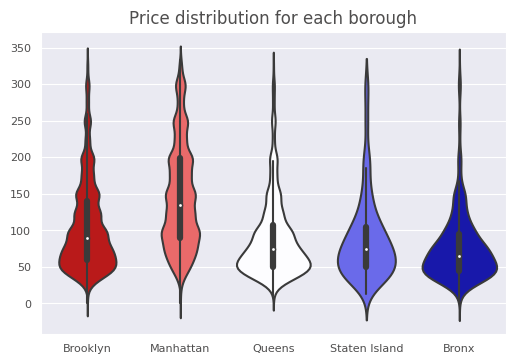

In [ ]:
# Plotting the price for each Boroughs
sns.violinplot(x='neighbourhood_group',y='price',data=df_subset,palette = 'seismic_r')
plt.title('Price distribution for each borough', size=12, color='#4f4e4e')
plt.xticks(size=8, color='#4f4e4e')
plt.xlabel('')
plt.ylabel('')
plt.yticks(size = 8,color='#4f4e4e')


**Manhattan** is the **most expensive** as the rental charges are more evenly distributed   across all the **price ranges**.

Median price in **Manhattan** is approx $140 thats around double the Median price of **Bronx**

#**Lets check on median price of each type of room in Boroughs**

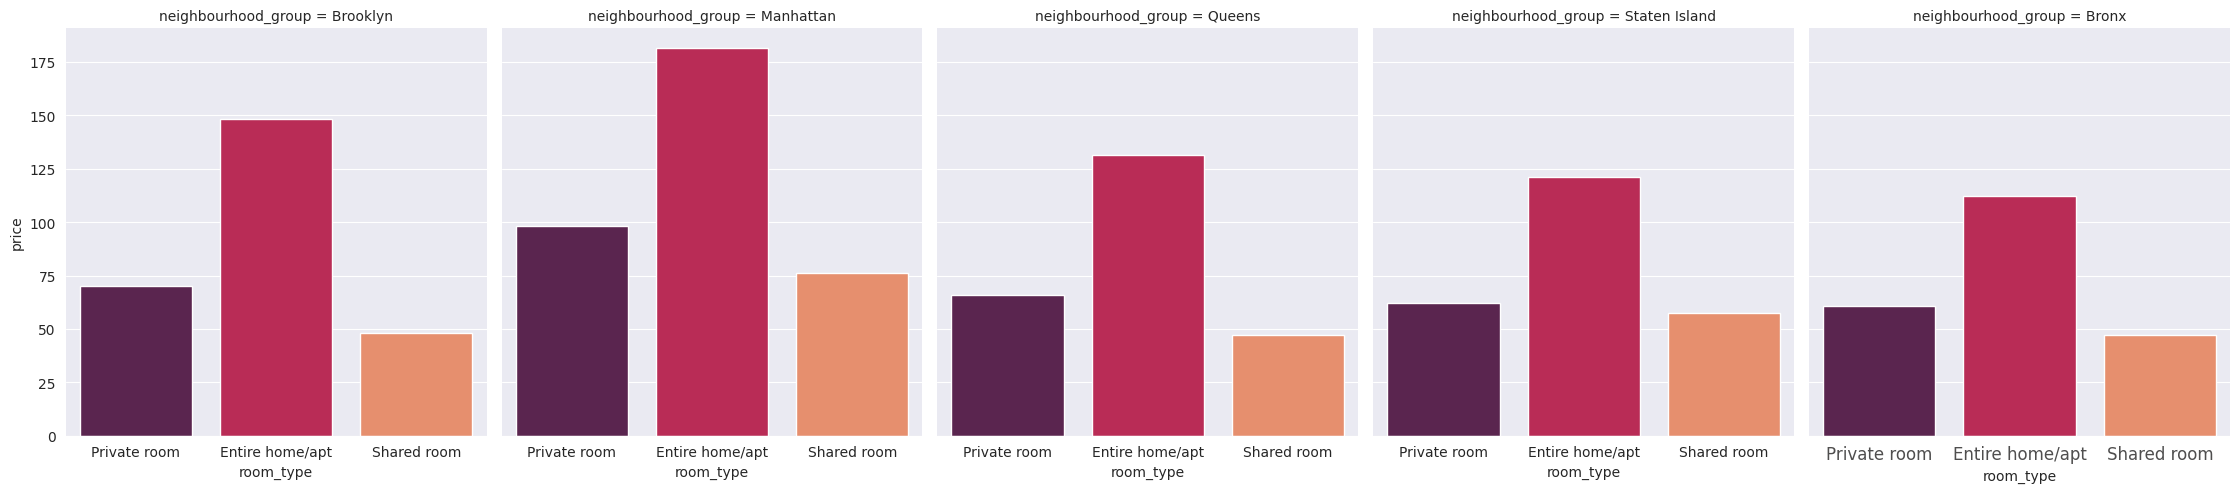

In [ ]:
plt.rcParams['figure.dpi'] = 100
sns.catplot(x="room_type", y="price", col="neighbourhood_group",data=df_subset, saturation=.8,kind="bar",ci=None,  aspect=.9,palette = 'rocket')
plt.xticks(size=12, color='#4f4e4e')
sns.despine(left = True)

**Manhattan is most expensive neighbourhood for each type of room, followed by Brooklyn and Queens.**

**Staten Island , rental charges are almost similar for Private and Shared room type.**

#**Lets check the most expensive and Least expensive Neighbourhood**

In [ ]:
# Most expensive listings
df_subset.sort_values('price',ascending = False)[['name','host_id','host_name','neighbourhood_group','neighbourhood','price']].head(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,price
15150,Midtown Sleep 6 Central Convenience,62031986,Adam,Manhattan,Midtown,333
38565,Parisian Palace in Heart of Manhattan,224001464,Aleszea,Manhattan,Chelsea,333
28062,27 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,76104209,Rated,Manhattan,Upper West Side,333
25161,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,35635299,Mel,Manhattan,Midtown,333
48567,Your Private Duplex Mansion in the HEART of NYC!,269146714,Clinton,Manhattan,West Village,333
19641,"SOMMwhere in NYC/ a unique, conscious artists ...",148108,Fatima,Manhattan,Lower East Side,333
45303,Five-star luxury Apt in Chelsea !,152747338,Paola,Manhattan,Chelsea,333
13798,Mid-Century Museum Sleepover,29065752,Cullen,Brooklyn,Williamsburg,333
32976,Luxurious 2bed/2.5bath with Central Park Views,4876826,Alex,Manhattan,Midtown,333
46439,CHELSEA CENTRAL LUXURY 2BATHS,184520918,Danilo & Larissa,Manhattan,Chelsea,332


Majority of most expensive listings are from **Manhattan**, in the Neighbourhood of **Midtown,Chelsea,Upper West Side, West Village,Lower East Side**

**Mid-Century Museum Sleepover** from Williamburg is the only listing from **Brooklyn** that comes under most expensive Listing.

In [ ]:
df_subset.sort_values('price',ascending = True)[['name','host_id','neighbourhood_group','neighbourhood','price']].head(11)  # Cheapest Listings

,name,host_id,neighbourhood_group,neighbourhood,price
26841,Coliving in Brooklyn! Modern design / Shared room,101970559,Brooklyn,Bushwick,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,0
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,0
25753,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,0
25778,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,0
25794,Spacious comfortable master bedroom with nice ...,86327101,Brooklyn,Bedford-Stuyvesant,0
25795,Contemporary bedroom in brownstone with nice view,86327101,Brooklyn,Bedford-Stuyvesant,0
25796,Cozy yet spacious private brownstone bedroom,86327101,Brooklyn,Bedford-Stuyvesant,0
26866,Best Coliving space ever! Shared room.,101970559,Brooklyn,Bushwick,0
26259,the best you can find,13709292,Manhattan,Murray Hill,0


Majority of  cheapest listings are from **Brooklyn**, in the Neighbourhood of **Bushwick,Greenpoint,Williamsburg, Bedford_Stuyvesant**

**★Hostel Style Room | Ideal Traveling Buddies★** from neigbourhood of **East Morrisania** is the onlly cheapest listing from **Bornx** 

**the best you can find** is the only cheapest Listing from **Manhattan**



**MOST EXPENSIVE HOSTS**

In [ ]:
P = {'price':['sum'],'minimum_nights' :['sum']}
Expensive_host = df_subset[['host_id','price','minimum_nights','neighbourhood_group']].groupby('host_id').agg(P).reset_index()
Expensive_host['avg_price_per_night'] = Expensive_host['price']/Expensive_host['minimum_nights']

In [ ]:
Expensive_host.sort_values('avg_price_per_night',ascending = False,inplace = True)

In [ ]:
Expensive_host.head(10)

,host_id,price,minimum_nights,avg_price_per_night
,,sum,sum,
30322,152747338,333,1,333.0
495,148108,333,1,333.0
24466,62031986,333,1,333.0
31642,184520918,332,1,332.0
35269,271624892,330,1,330.0
34889,265271198,330,1,330.0
8495,6562449,325,1,325.0
18590,30322413,325,1,325.0
1153,415290,325,1,325.0


**Per night average charges for the Top 3 hosts is aroung 333 USD**

#**Visualizing variables with Longitude and Latitude**

Text(0, 0.5, 'Latitude')

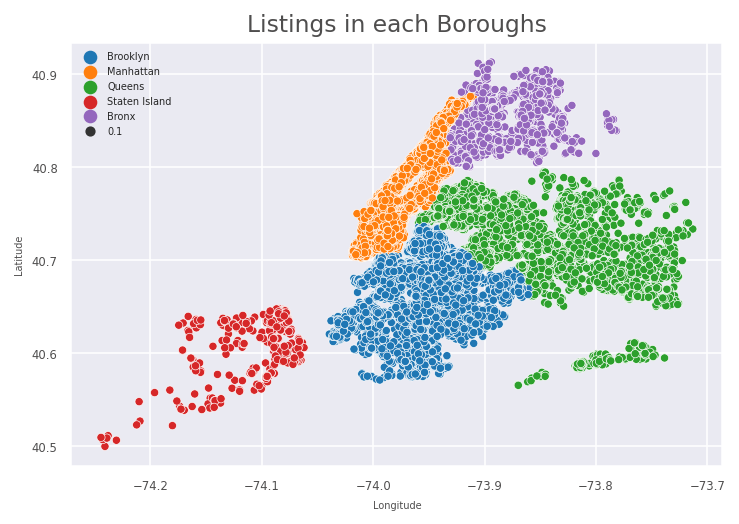

In [ ]:
# Plotting the graphs based on the Longitude and Latitude
plt.rcParams['figure.dpi'] = 140
sns.set_style("darkgrid")
sns.scatterplot(data= df_subset, x  = 'longitude',y = 'latitude', hue = 'neighbourhood_group',size = 0.1)
plt.legend(loc="upper left", frameon=False, fontsize= 5)
plt.title('Listings in each Boroughs', size=12, color='#4f4e4e')
plt.xticks(size=6, color='#4f4e4e')
plt.yticks(size=6, color='#4f4e4e')
plt.xlabel('Longitude',size=5, color='#4f4e4e')
plt.ylabel('Latitude',size=5, color='#4f4e4e')

Text(0, 0.5, 'Latitude')

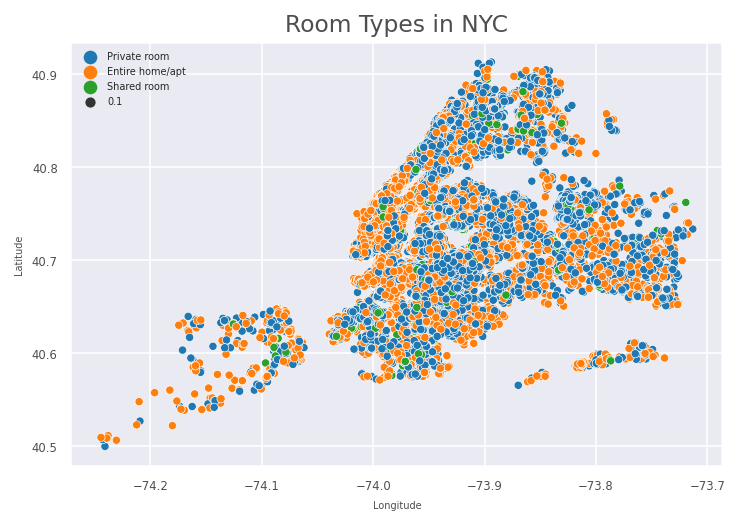

In [ ]:
# Vizualising the room types in the NYC city
sns.scatterplot(data= df_subset, x  = 'longitude',y = 'latitude', hue = 'room_type',size = 0.1)
plt.legend(loc="upper left", frameon=False, fontsize= 5)
plt.title('Room Types in NYC', size=12, color='#4f4e4e')
plt.xticks(size=6, color='#4f4e4e')
plt.yticks(size=6, color='#4f4e4e')
plt.xlabel('Longitude',size=5, color='#4f4e4e')
plt.ylabel('Latitude',size=5, color='#4f4e4e')

**Privat Room** and **Entire Home** steal the show in terms of majority booking

As we already saw in earlier visualization, **97%** of rooms are either **Private** or **Entire home**.

In [ ]:
img=imread('/content/drive/MyDrive/Airbnb data/Copy of Airbnb NYC 2019.csv')

plt.imshow(img,zorder=0,extent=[df_subset['longitude'].min(),df_subset['longitude'].max(),df_subset['latitude'].min(),df_subset['latitude'].max()])
ax = plt.gca()
df_subset.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(12,8))
plt.title('Pricing Trend in NYC', size=12, color='#4f4e4e')
plt.xticks(size=6, color='#4f4e4e')
plt.yticks(size=6, color='#4f4e4e')
plt.xlabel('Longitude',size=5, color='#4f4e4e')
plt.ylabel('Latitude',size=5, color='#4f4e4e')
plt.show()

As we saw in earlier visualizations Most of the expensive listings are from **Manhattan**

**but the majority of the listings price range is approx 0-80 USD in the NYC**

#**Listing names in each Neighbourhood**

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
plt.figure(figsize=(12,8))
text = ' '.join(str(n).lower() for n in df_subset.name)
#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white',width = 1920, height = 1080).generate(text)
plt.figure(figsize=(12,8))
#Display the image
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#host prefer to use **Private rooms,brooklyn,central park,modern,nyc and Beautiful** these words in their listing to seek customer attention.

**This validates our analysis, since Most listings were of Private room,most of the least expensive rooms were from Brooklyn.**

**Central Park, Manhattan appears in the names of most of listings as it is the centre of Activites in New york,**

**Proximity to transportation services is one important parameter while searching for rental space, from our analysis Brooklyn and Manhattan seems to be the busiest boroughs in NYC**
